In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Tip')

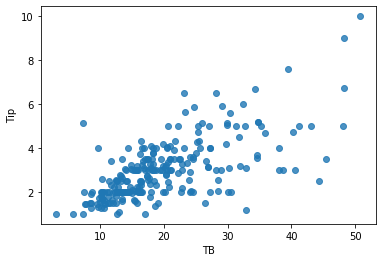

In [10]:
tips=sns.load_dataset("tips")
ax=sns.regplot(x="total_bill", y="tip", data=tips, fit_reg=False)
ax.set_xlabel("TB")
ax.set_ylabel("Tip")


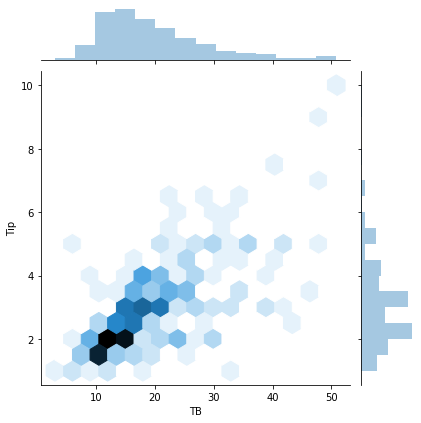

In [11]:
joint=sns.jointplot(x="total_bill", y="tip",data=tips, kind="hex") #jointplot : 안에는 scatter , 바깥에는 hist
joint.set_axis_labels(xlabel="TB", ylabel="Tip")

Text(0.5, 1.0, 'Kernel Density Plot')

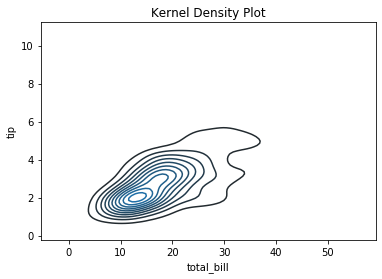

In [16]:
#이차원 밀집도 그래프
kde,ax=plt.subplots()
sns.kdeplot(data=tips["total_bill"], data2=tips["tip"]) #shade=True : 투명도 
ax.set_title("Kernel Density Plot")

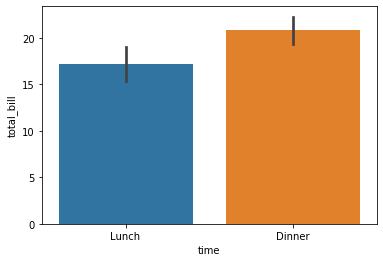

In [18]:
ax=plt.subplots()
sns.barplot(x="time",y="total_bill", data=tips)

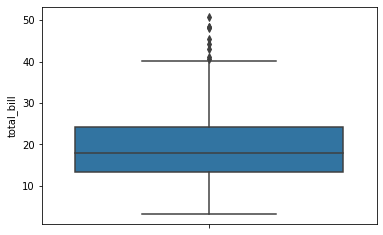

In [27]:
ax=plt.subplots()
sns.boxplot(x="total_bill", data=tips, orient="v") #orient=v 

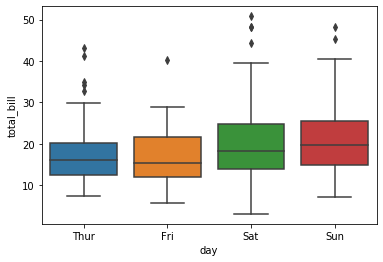

In [28]:
sns.boxplot(x="day",y="total_bill", data=tips, orient="v")

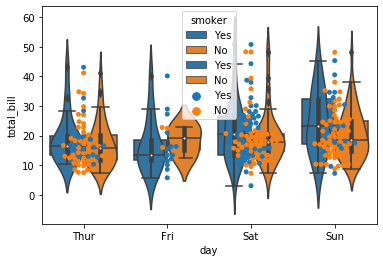

In [31]:
sns.boxplot(x="day",y="total_bill", data=tips, orient="v", hue="smoker")
sns.swarmplot(x="day",y="total_bill", data=tips, orient="v", hue="smoker") 
sns.violinplot(x="day",y="total_bill", data=tips, orient="v", hue="smoker")#violinplot:데이터분포확인

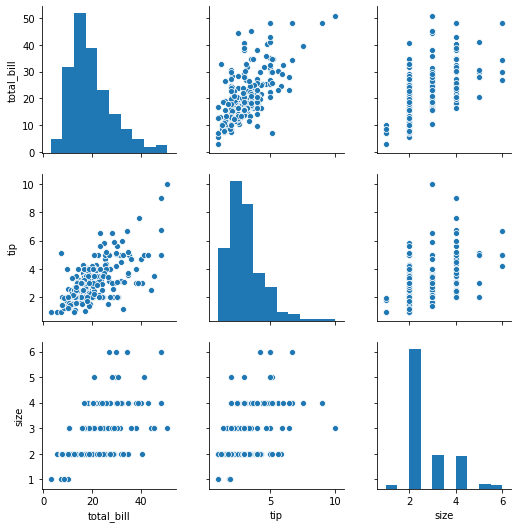

In [32]:
sns.pairplot(tips)

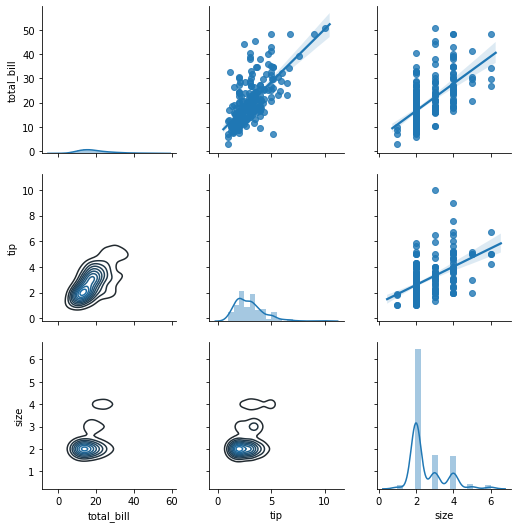

In [36]:
pg=sns.PairGrid(tips) #3 by 3 
pg.map_upper(sns.regplot)
pg.map_lower(sns.kdeplot) 
pg.map_diag(sns.distplot) #대각선

In [37]:
iris=sns.load_dataset("iris")
titanic=sns.load_dataset("titanic")
flights=sns.load_dataset("flights")

In [43]:
iris.info()
iris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


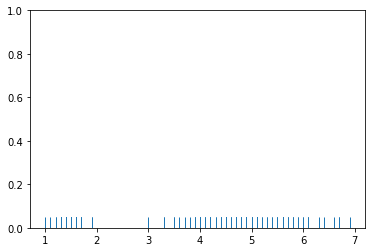

In [45]:
x=iris.petal_length.values #.values : array형태로 출력
sns.rugplot(x)

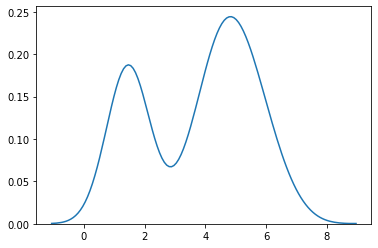

In [46]:
sns.kdeplot(x)

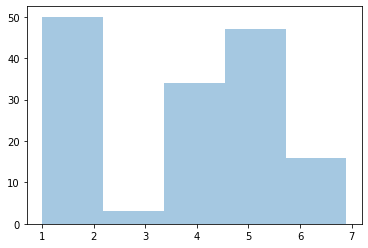

In [48]:
sns.distplot(x, kde=False)

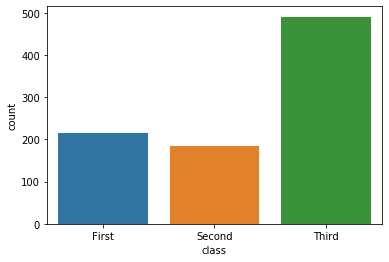

In [49]:
#countplot : 각 종류별 데이터가 얼마나 있는지 표시

sns.countplot(x="class", data=titanic)

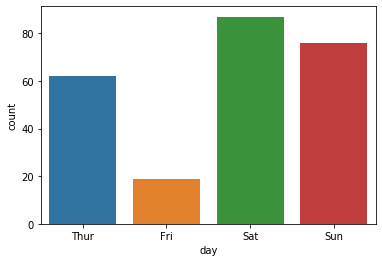

In [50]:
sns.countplot(x="day", data=tips)

In [ ]:
"""
1)1차원 데이터 : 실수값 => kernel Density , rugplot, kdeplot, distplot
2)카테고리 데이터 : countplot
3)n차원 데이터 :
-2차원 실수형 데이터 => scatterplot
-3차원이상 실수형 데이터 => pairplot, PairGrid
4)2차원 카테고리 데이터 : heatmap
5)2차원 실수형 + 카테고리형 : bar, box, point, violinplot, swarmplot
"""

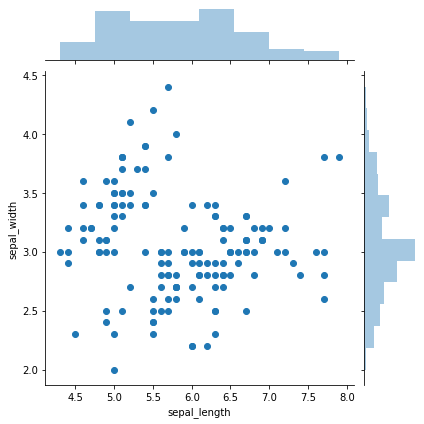

In [53]:
sns.jointplot(x="sepal_length", y= "sepal_width", data=iris, kind="scatter")

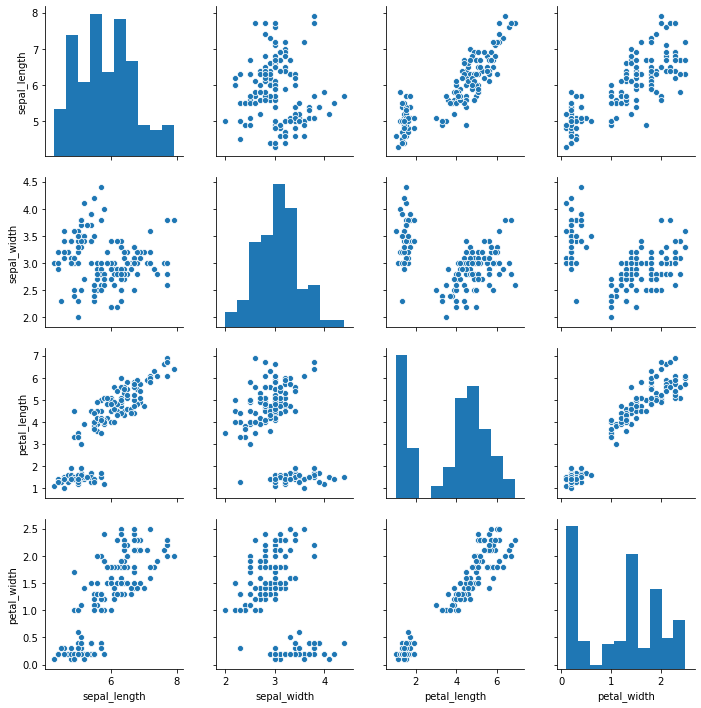

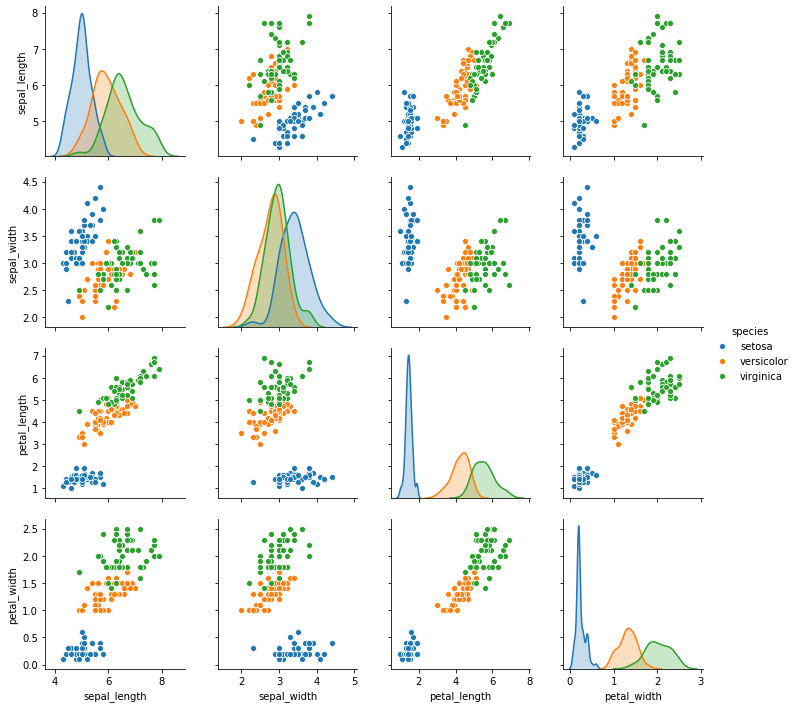

In [57]:
#3차원데이터
sns.pairplot(iris)  #실수형에 대해서만 출력 (species는 범위형)
sns.pairplot(iris, hue="species") #markers=["o","s","D"]

In [59]:
#2차원 + 카테고리형 : heatmap
import pandas as pd

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [81]:
#sc=titanic.groupby("sex")["class"].value_counts()
titanic_size=pd.pivot_table(titanic,index="class", columns="sex", aggfunc="size")

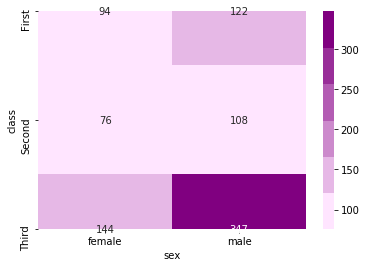

In [93]:
sns.heatmap(titanic_size, annot=True, fmt="d", cmap=sns.light_palette("purple"))

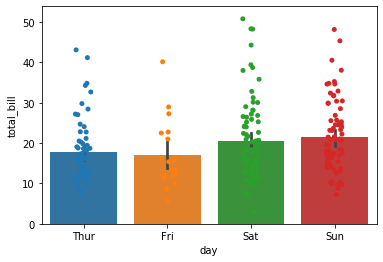

In [96]:
#2차원 데이터 실수 , 카테고리가 섞임
sns.barplot(x="day", y="total_bill", data=tips)
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)

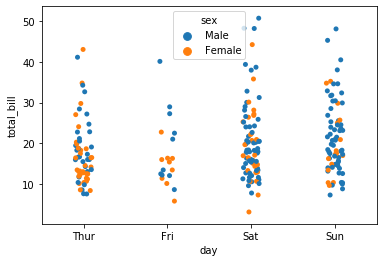

In [98]:
sns.stripplot(data=tips,x="day", y="total_bill", hue="sex")

In [100]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


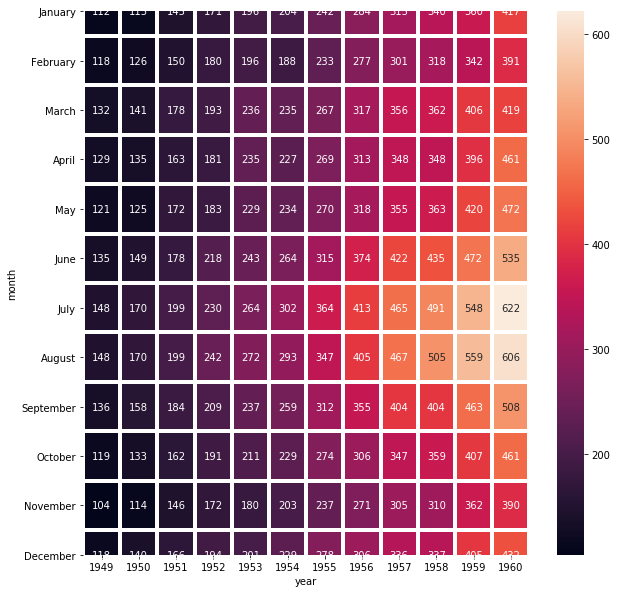

In [124]:
fp=flights.pivot("month","year","passengers")
f, ax = plt.subplots()
f.set_size_inches(10,10)
sns.heatmap(fp, linewidths=3,annot=True,fmt="d",ax=ax) #구분선


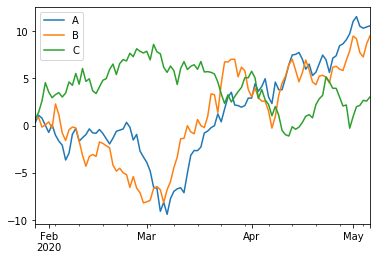

In [114]:
import numpy as np

df=pd.DataFrame(np.random.randn(100,3), index=pd.date_range("1/28/2020",periods=100), columns=["A","B","C"]).cumsum()
df.plot()

In [128]:
df2=iris.groupby(iris.species).mean()
df2

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


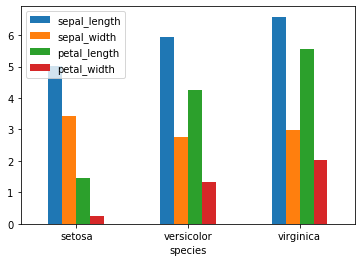

In [129]:
df2.plot.bar(rot=0)

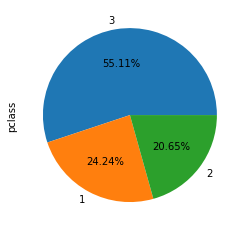

In [134]:
df=titanic.pclass.value_counts()
df.plot.pie(autopct="%.2f%%") 

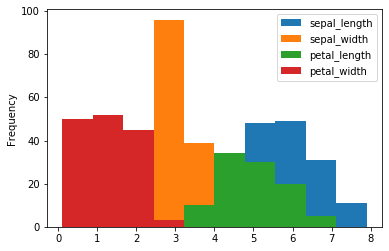

In [136]:
iris.plot.hist()

## 선형대수 

In [ ]:
"""
데이터 갯수 , 형태에 따라서 
스칼라(숫자1개),
벡터(숫자 여러개),
행렬(벡터가 여러개인 데이터 집합),
텐서(같은 크기의 행렬이 여러개 있는 집합)
"""

In [140]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [143]:
#numpy : 선형대수 문제 해결 사용
x1=np.array([[5.1],[3.1],[1.4],[0.2]])
x1

array([[5.1],
       [3.1],
       [1.4],
       [0.2]])

In [145]:
from sklearn.datasets import load_digits
digits=load_digits()

In [148]:
digits
samples=[0,10,20,30,1,11,21,31]
d=[]
for i in range(8):
    d.append(digits.images[samples[i]])
print(d)

[array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]), array([[ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.],
       [ 0.,  0., 11., 16.,  8., 14.,  6.,  0.],
       [ 0.,  2., 16., 10.,  0.,  9.,  9.,  0.],
       [ 0.,  1., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  4., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  1., 16.,  5.,  1., 11.,  3.,  0.],
       [ 0.,  0., 12., 12., 10., 10.,  0.,  0.],
       [ 0.,  0.,  1., 10., 13.,  3.,  0.,  0.]]), array([[ 0.,  0.,  3., 13., 11.,  7.,  0.,  0.],
       [ 0.,  0., 11., 16., 16., 16.,  2.,  0.],
       [ 0.,  4., 16.,  9.,  1., 14.,  2.,  0.],
       [ 0.,  4., 16.,  0.,  0., 16.,  2.,  0.],
       [ 0.,  0

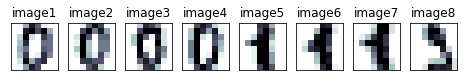

In [156]:
plt.figure(figsize=(8,2))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(d[i],cmap=plt.cm.bone_r)
    plt.title("image{}".format(i+1))
    plt.grid(False)
    plt.xticks([]); plt.yticks([]) 

In [207]:
#2차원 이미지 => 64차원
# v=[]
# for i in range(8):
#     v.append(d[i].reshape(64,1))
#     plt.imshow(v[i],cmap=plt.cm.bone_r)
#     plt.grid(False)
#     plt.xticks([]);plt.yticks([])

In [160]:
#행렬
a=np.array([[10,20,30],[40,50,60]])
a

array([[10, 20, 30],
       [40, 50, 60]])

In [164]:
#텐서(다차원배열)
from scipy import misc
img=misc.face()
img.shape #768*1024*3 (3차원)

(768, 1024, 3)

(-0.5, 1023.5, 767.5, -0.5)

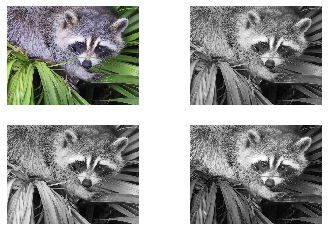

In [169]:
plt.subplot(221) #2*2로 나눔, 1번째 위치 출력
plt.imshow(img, cmap=plt.cm.gray)
plt.axis("off")

plt.subplot(222) 
plt.imshow(img[:,:,0], cmap=plt.cm.gray) #R channel
plt.axis("off")

plt.subplot(223) 
plt.imshow(img[:,:,1], cmap=plt.cm.gray) #G
plt.axis("off")

plt.subplot(224) 
plt.imshow(img[:,:,2], cmap=plt.cm.gray) #B
plt.axis("off")

In [173]:
#두 벡터와 행렬에서 같은 위치에 있는 요소끼리 덧셈/뺄셈 
x=np.array([1,2])
y=np.array([3,4])
x+y
x-y

array([-2, -2])

In [ ]:
#스칼라와 벡터/행렬간 곱셈
#선형조합:벡터/행렬에 스칼라값을 곱한후 더하기

#벡터내적: 두 벡터의 곱셈(dot)
#두 벡터의 차원이 같아야함
#행벡터  * 열벡터 => 스칼라

In [180]:
x=np.array([[1],[2],[3]])
x
y=np.array([[4],[5],[6]])
y
np.dot(x.T,y)
x.T@y

array([[32]])

In [ ]:
#데이터 벡터
#가중치 벡터
#데이터 벡터의 가중치 합

In [206]:
"""
벡터의 내적은 두벡터의 유사도를 계산하는 데 
유사도? 두 벡터가 닮은 정도

"""
digits=load_digits()
d1=digits.images[0]
d1
# d2=digits.images[10]
# d3=digits.images[1]
# d4=digits.images[11]

# v1=d1.reshape(64,1)
# v2=d2.reshape(64,1)
# v3=d3.reshape(64,1)
# v4=d4.reshape(64,1)

# plt.figure(figsize=(9,9))
# import matplotlib.gridspec as gridspec #gridspec

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [187]:
gs=gridspec.GridSpec(1,8,height_ratios=[1],width_ratios=[9,1,9,1,9,1,9,1])

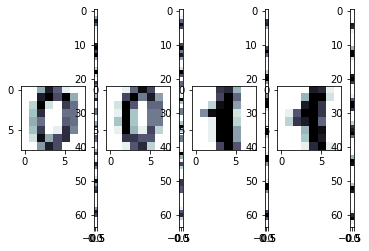

In [192]:
for i in range(4):
    plt.subplot(gs[2*i])
    plt.imshow(eval("d"+str(i+1)),cmap=plt.cm.bone_r)
    plt.subplot(gs[2*i+1])
    plt.imshow(eval("v"+str(i+1)),cmap=plt.cm.bone_r)

In [205]:
(v1.T@v2)[0][0] #v1과 v2 내적 #3064
(v1.T@v3)[0][0] #v1과 v3 내적 #1866
(v1.T@v4)[0][0] #v1과 v4 내적 #1883

0.0

In [202]:
np.dot(v2.T,v3)[0][0] #2421
np.dot(v2.T,v4)[0][0] #2479

np.dot(v3.T,v4)[0][0] #3661

3661.0